In [18]:
import pandas as pd
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pingouin import pairwise_ttests

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from matplotlib.gridspec import GridSpec
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
np.set_printoptions(threshold=sys.maxsize)



In [19]:
df = pd.read_csv('data.csv')
df['bathrooms'] = list(map(int, df['bathrooms']))

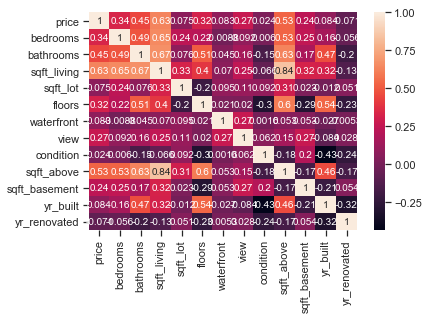

In [20]:
sns.heatmap(df.corr('spearman'), annot =True)

In [21]:
df.corr('spearman')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.337863,0.448376,0.631264,0.075483,0.320929,0.083184,0.267564,0.023843,0.534038,0.236591,0.084415,-0.070935
bedrooms,0.337863,1.000000,0.487081,0.651607,0.237566,0.220267,-0.008774,0.092243,0.006001,0.532720,0.248473,0.159718,-0.056341
bathrooms,0.448376,0.487081,1.000000,0.669674,0.076219,0.508885,0.044841,0.155411,-0.153803,0.632061,0.172337,0.467769,-0.196109
sqft_living,0.631264,0.651607,0.669674,1.000000,0.325200,0.396749,0.069558,0.249297,-0.066262,0.843412,0.322549,0.322430,-0.126955
sqft_lot,0.075483,0.237566,0.076219,0.325200,1.000000,-0.204243,0.094542,0.112377,0.091853,0.305195,0.022575,-0.012471,0.051275
floors,0.320929,0.220267,0.508885,0.396749,-0.204243,1.000000,0.021170,0.019924,-0.303411,0.603723,-0.288010,0.537538,-0.229399
waterfront,0.083184,-0.008774,0.044841,0.069558,0.094542,0.021170,1.000000,0.272121,0.001570,0.052719,0.052983,-0.026801,0.005345
view,0.267564,0.092243,0.155411,0.249297,0.112377,0.019924,0.272121,1.000000,0.061721,0.152727,0.270010,-0.083885,0.027501
condition,0.023843,0.006001,-0.153803,-0.066262,0.091853,-0.303411,0.001570,0.061721,1.000000,-0.183099,0.201031,-0.433361,-0.241569
sqft_above,0.534038,0.532720,0.632061,0.843412,0.305195,0.603723,0.052719,0.152727,-0.183099,1.000000,-0.171684,0.460306,-0.169395


## Modeling

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [23]:
X = df.loc[:, df.columns.isin(['bedrooms','bathrooms','floor','sqft_living'])]
y = df['price']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= 101)


In [25]:
model = RandomForestRegressor(n_estimators = 100, random_state = 110)
model.fit(X, y)  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=110, verbose=0, warm_start=False)

In [26]:
y_pred = model.predict(X_test) 

In [27]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2  Score:', metrics.r2_score(y_test, y_pred))



MAE: 127089.49723051164
MSE: 91711809239.70668
RMSE: 302839.5767394128
R2  Score: 0.6416828081958632


In [28]:
import pickle
filename = 'model_house_price.sav'
pickle.dump(model, open(filename, 'wb'))

## Apply on Flask

In [29]:
params = {'bedrooms':[3], 'bathrooms':[2], 'sqft_living': [2270]}
params = pd.DataFrame(params)
params

,bedrooms,bathrooms,sqft_living
0,3,2,2270


In [33]:
int(model.predict(params))

604655